In [ ]:
# VGQEC for 5 qubits

import pennylane as qml
import numpy as np

dev_sample = qml.device("default.mixed", wires=11, shots=1)
dev_analytic = qml.device("default.mixed", wires=11, shots=1000)

def encoding_variation_circuit_5(wires, alpha):
    # for wire in wires:
    #     qml.RZ(alpha[0], wires=wire)
    qml.RZ(alpha[0], wires=0)
    qml.RZ(alpha[46], wires=1)
    qml.RZ(alpha[47], wires=2)
    qml.RZ(alpha[48], wires=3)
    qml.RZ(alpha[49], wires=4)

    qml.IsingZZ(alpha[1], wires=[0, 1])
    qml.IsingZZ(alpha[2], wires=[3, 4])

    qml.RX(alpha[3], wires=1)
    qml.RX(alpha[4], wires=3)

    qml.IsingZZ(alpha[5], wires=[1, 2])
    qml.IsingZZ(alpha[6], wires=[2, 3])

    qml.RX(alpha[7], wires=2)

    qml.IsingZZ(alpha[8], wires=[1, 2])
    qml.IsingZZ(alpha[9], wires=[2, 3])

    qml.RX(alpha[10], wires=1)
    qml.RX(alpha[11], wires=3)

    qml.IsingZZ(alpha[12], wires=[0, 1])
    qml.IsingZZ(alpha[13], wires=[1, 2])
    qml.IsingZZ(alpha[14], wires=[2, 3])
    qml.IsingZZ(alpha[15], wires=[3, 4])

    qml.RX(alpha[16], wires=0)
    qml.RX(alpha[17], wires=2)
    qml.RX(alpha[18], wires=4)

    qml.IsingZZ(alpha[19], wires=[1, 2])
    qml.IsingZZ(alpha[20], wires=[2, 3])

    qml.RX(alpha[21], wires=1)
    qml.RX(alpha[22], wires=2)
    qml.RX(alpha[23], wires=3)

    qml.IsingZZ(alpha[24], wires=[1, 2])
    qml.IsingZZ(alpha[25], wires=[2, 3])

    qml.RX(alpha[26], wires=2)

    qml.IsingZZ(alpha[27], wires=[1, 2])
    qml.IsingZZ(alpha[28], wires=[2, 3])

    qml.RX(alpha[29], wires=1)
    qml.RX(alpha[30], wires=3)

    qml.IsingZZ(alpha[31], wires=[0, 1])
    qml.IsingZZ(alpha[32], wires=[3, 4])

    qml.RX(alpha[33], wires=1)
    qml.RX(alpha[34], wires=3)

    qml.IsingZZ(alpha[35], wires=[1, 2])
    qml.IsingZZ(alpha[36], wires=[2, 3])  

    qml.RX(alpha[37], wires=2)

    qml.IsingZZ(alpha[38], wires=[1, 2])
    qml.IsingZZ(alpha[39], wires=[2, 3])  

    qml.RX(alpha[40], wires=1)
    qml.RX(alpha[41], wires=3)

    qml.IsingZZ(alpha[42], wires=[0, 1])
    qml.IsingZZ(alpha[43], wires=[3, 4])
    
    qml.RX(alpha[44], wires=0)
    qml.RX(alpha[45], wires=4)

    qml.RZ(alpha[50], wires=0)
    qml.RZ(alpha[51], wires=1)
    qml.RZ(alpha[52], wires=2)
    qml.RZ(alpha[53], wires=3)
    qml.RZ(alpha[54], wires=4)

        
def encoding_circuit_513(wires):
    for wire in wires[1:]:
        qml.CNOT(wires=[0, wire])
    for wire in wires:
        qml.Hadamard(wires=wire)
    
    qml.IsingZZ(-np.pi/2, wires=[4, 0])
    qml.IsingZZ(-np.pi/2, wires=[0, 1])
    qml.IsingZZ(-np.pi/2, wires=[1, 2])
    qml.IsingZZ(-np.pi/2, wires=[2, 3])
    qml.IsingZZ(-np.pi/2, wires=[3, 4])

    
def apply_noise_layer(gamma):

#     for wire in range(5):
#         qml.AmplitudeDamping(gamma, wires=wire)
    
    qml.AmplitudeDamping(1.0, wires=0)

    
# --- SYNDROME MEASUREMENT ---
def measure_syndrome():
    
    # S1 = X Z Z X I
    qml.Hadamard(7)
    qml.Hadamard(0); qml.Hadamard(3)
    for i in [0, 1, 2, 3]:
        qml.CNOT(wires=[i, 7])
    qml.Hadamard(0); qml.Hadamard(3)

    # S2 = I X Z Z X
    qml.Hadamard(8)
    qml.Hadamard(1); qml.Hadamard(4)
    for i in [1, 2, 3, 4]:
        qml.CNOT(wires=[i, 8])
    qml.Hadamard(1); qml.Hadamard(4)

    # S3 = X I X Z Z
    qml.Hadamard(9)
    qml.Hadamard(0); qml.Hadamard(2)
    for i in [0, 2, 3, 4]:
        qml.CNOT(wires=[i, 9])
    qml.Hadamard(0); qml.Hadamard(2)

    # S4 = Z X I X Z
    qml.Hadamard(10)
    qml.Hadamard(1); qml.Hadamard(3)
    for i in [0, 1, 3, 4]:
        qml.CNOT(wires=[i, 10])
    qml.Hadamard(1); qml.Hadamard(3)
    
# --- CORRECTION MAPPING ---
def decode_and_correct(syndrome):
    syndrome_map = {
        (0, 0, 0, 0): None,
        (0, 0, 0, 1): (0, 'X'), (1, 0, 0, 0): (1, 'X'), 
        (1, 1, 0, 0): (2, 'X'), (0, 1, 1, 0): (3, 'X'), 
        (0, 0, 1, 1): (4, 'X'), (1, 0, 1, 0): (0, 'Z'), 
        (0, 1, 0, 1): (1, 'Z'), (0, 0, 1, 0): (2, 'Z'), 
        (1, 0, 0, 1): (3, 'Z'), (0, 1, 1, 1): (4, 'Z'),
        (1, 0, 1, 1): (0, 'Y'), (1, 1, 0, 1): (1, 'Y'), 
        (1, 1, 1, 0): (2, 'Y'), (1, 1, 1, 1): (3, 'Y'), 
        (0, 1, 0, 0): (4, 'Y')
    }
    key = tuple(syndrome)
    if key not in syndrome_map or syndrome_map[key] is None:
        return []
    qubit, op = syndrome_map[key]
    return [getattr(qml, f'Pauli{op}')(wires=qubit)]


def decode_variational_5(beta, wires, L):
    # rzz_pairs = [
    #     (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6),
    #     (1, 2), (1, 3), (1, 4), (1, 5), (1, 6),
    #     (2, 3), (2, 4), (2, 5), (2, 6),
    #     (3, 4), (3, 5), (3, 6),
    #     (4, 5), (4, 6),
    #     (5, 6)
    # ]

    qml.RZ(beta[0], wires=wires[0])
    qml.RZ(beta[1], wires=wires[1])
    qml.RZ(beta[2], wires=wires[2])
    qml.RZ(beta[3], wires=wires[3])
    qml.RZ(beta[4], wires=wires[4])

    for i in range(L):

        qml.RX(beta[5], wires=wires[0])
        qml.RX(beta[6], wires=wires[1])
        qml.RX(beta[7], wires=wires[2])
        qml.RX(beta[8], wires=wires[3])
        qml.RX(beta[9], wires=wires[4])

        qml.RZ(beta[0], wires=wires[0])
        qml.RZ(beta[1], wires=wires[1])
        qml.RZ(beta[2], wires=wires[2])
        qml.RZ(beta[3], wires=wires[3])
        qml.RZ(beta[4], wires=wires[4])

        qml.IsingZZ(beta[10], wires=[0, 1])
        qml.IsingZZ(beta[11], wires=[1, 2])
        qml.IsingZZ(beta[12], wires=[2, 3])
        qml.IsingZZ(beta[13], wires=[3, 4])
        qml.IsingZZ(beta[14], wires=[0, 2])
        qml.IsingZZ(beta[15], wires=[2, 4])
        qml.IsingZZ(beta[16], wires=[1, 3])
        qml.IsingZZ(beta[17], wires=[0, 3])
        qml.IsingZZ(beta[18], wires=[1, 4])
        qml.IsingZZ(beta[19], wires=[0, 4])
        qml.IsingZZ(beta[20], wires=[0, 5])
        qml.IsingZZ(beta[21], wires=[0, 6])
        qml.IsingZZ(beta[22], wires=[1, 5])
        qml.IsingZZ(beta[23], wires=[1, 6])
        qml.IsingZZ(beta[24], wires=[2, 5])
        qml.IsingZZ(beta[25], wires=[2, 6])
        qml.IsingZZ(beta[26], wires=[3, 5])
        qml.IsingZZ(beta[27], wires=[3, 6])
        qml.IsingZZ(beta[28], wires=[4, 5])
        qml.IsingZZ(beta[29], wires=[4, 6])
        qml.IsingZZ(beta[30], wires=[5, 6])
        

    qml.RX(beta[5], wires=wires[0])
    qml.RX(beta[6], wires=wires[1])
    qml.RX(beta[7], wires=wires[2])
    qml.RX(beta[8], wires=wires[3])
    qml.RX(beta[9], wires=wires[4])

    qml.RZ(beta[0], wires=wires[0])
    qml.RZ(beta[1], wires=wires[1])
    qml.RZ(beta[2], wires=wires[2])
    qml.RZ(beta[3], wires=wires[3])
    qml.RZ(beta[4], wires=wires[4])

        

        
@qml.qnode(dev_sample)
def apply_noise_and_measure(gamma, alpa):
    encoding_circuit_513(dev_sample.wires)
    
    encoding_variation_circuit_5(dev_sample.wires, alpha)
    
    apply_noise_layer(gamma)
    
    decode_variational_5(beta, dev_sample.wires)
    
    measure_syndrome()
    
    return qml.sample(wires=[7, 8, 9, 10])


@qml.qnode(dev_sample)
def apply_correction(correction_ops=[]):
    for op in correction_ops:
        op.queue()
        
    return qml.density_matrix(wires=[0])  # logical qubit


# if __name__ == '__main__':
    
#     gamma = 0.0
    
#     alpha = [np.pi/2, np.pi/2, np.pi/2]
#     beta = [np.pi/2, np.pi/2, np.pi/2]

#     print(qml.draw_mpl(apply_noise_and_measure(gamma, alpha)))
    
#     all_fc = []
#     all_gamma = []
    
#     iterations = 10 
    
#     while(gamma<=0.5):
        
#         totoal_fid = 0
        
#         for i in range(iterations):
#             syndrome = apply_noise_and_measure(gamma, alpha)
            
#             correction_ops = decode_and_correct(list(syndrome))
            
#             result = apply_correction(correction_ops)

#             ent_fidelity = np.mean(result == 0)  # Measure probability of |0>
#             totoal_fid += ent_fidelity

#             print("Syndrome:", list(syndrome))
#             print("Correction ops:", correction_ops)

#             print("Fidelity after recovery:", ent_fidelity)
#             print("-" * 40)
        
#         all_fc.append(compute_fc(totoal_fid/iterations)) # Take avg of all iterations
#         all_gamma.append(gamma)
        
#         print("gamma = ", gamma, "; avg fid = ", compute_fc(totoal_fid/iterations), "\n")
        
#         gamma+=0.05
        
        
        
# xpoints = all_gamma
# ypoints = all_fc

# plt.title("Channel Fidelity vs Gamma")
# plt.plot(xpoints, ypoints)
# plt.show()

(<Figure size 3400x600 with 1 Axes>, <Axes: >)


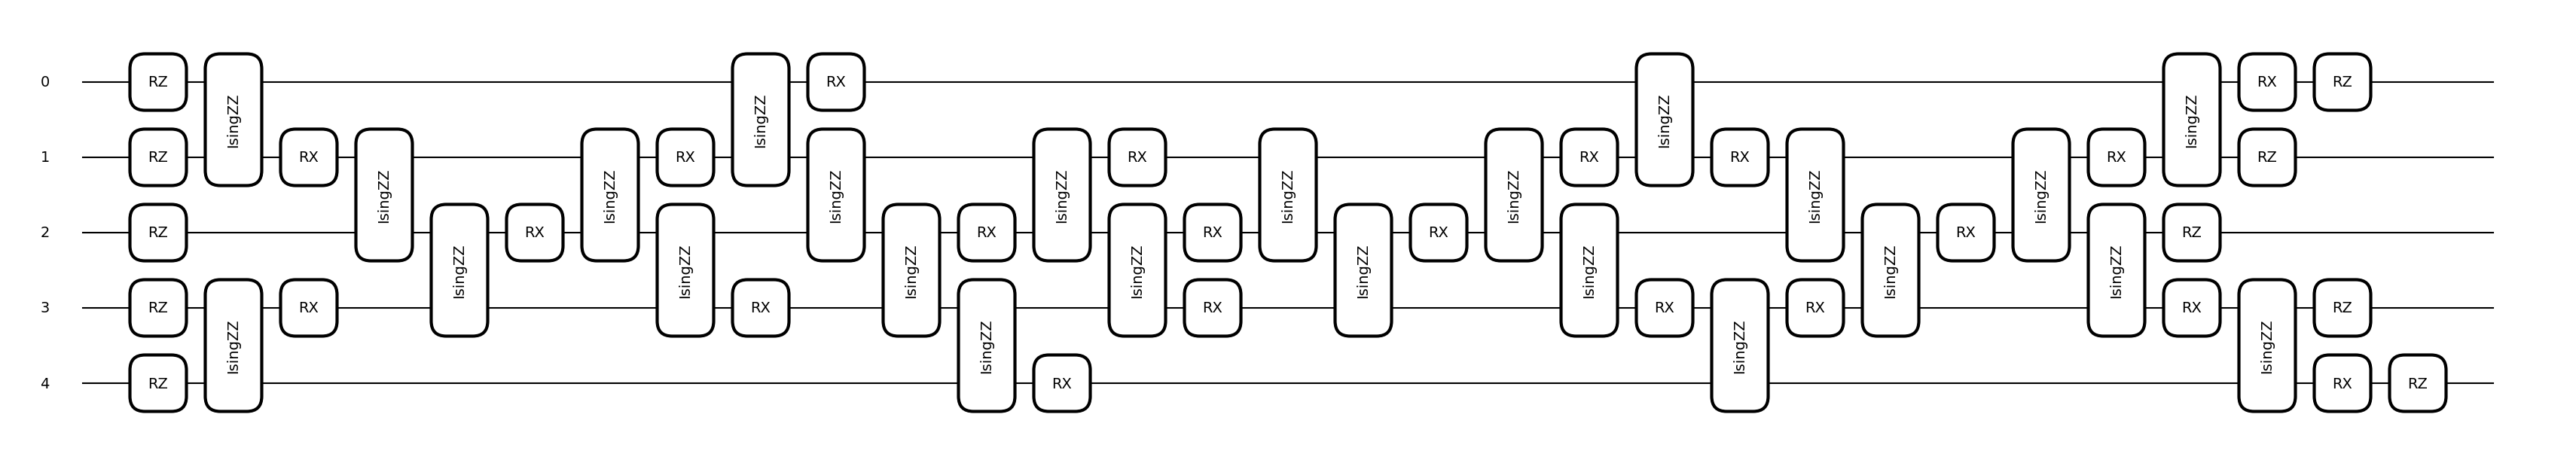

In [14]:
print(qml.draw_mpl(encoding_variation_circuit_5)([0, 1, 2, 3, 4], [1, 1, 1]))

(<Figure size 1300x600 with 1 Axes>, <Axes: >)


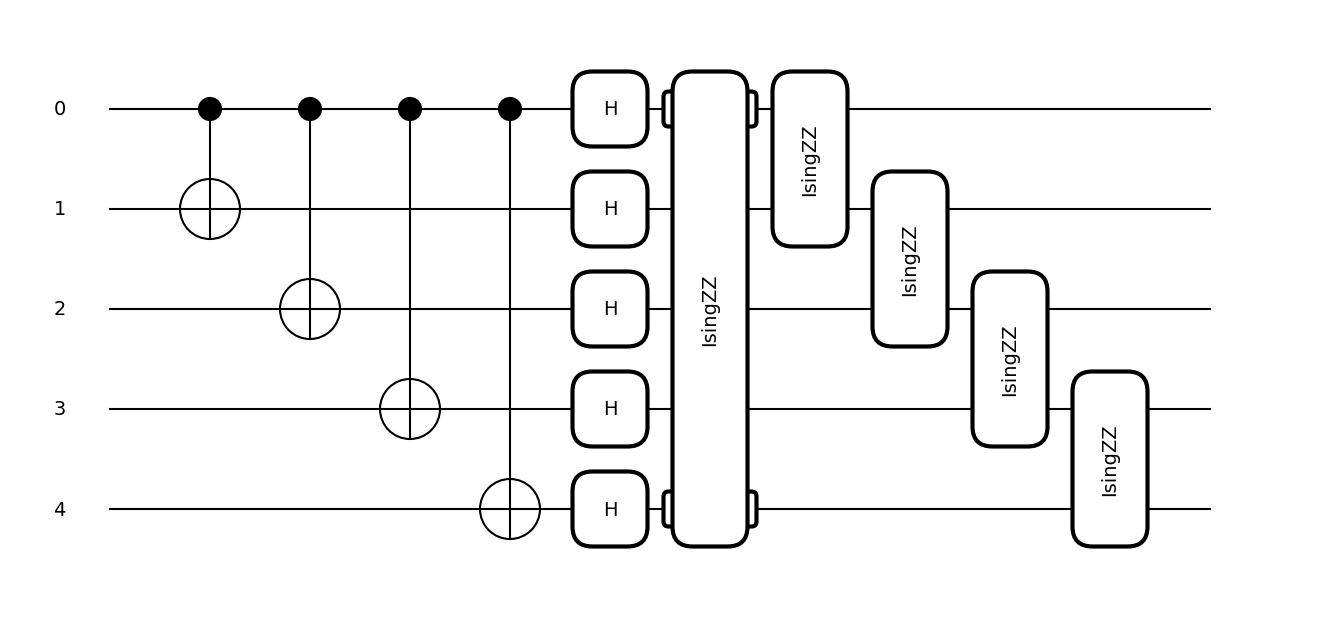

In [10]:
print(qml.draw_mpl(encoding_circuit_513)([0, 1, 2, 3, 4]))

(<Figure size 2900x800 with 1 Axes>, <Axes: >)


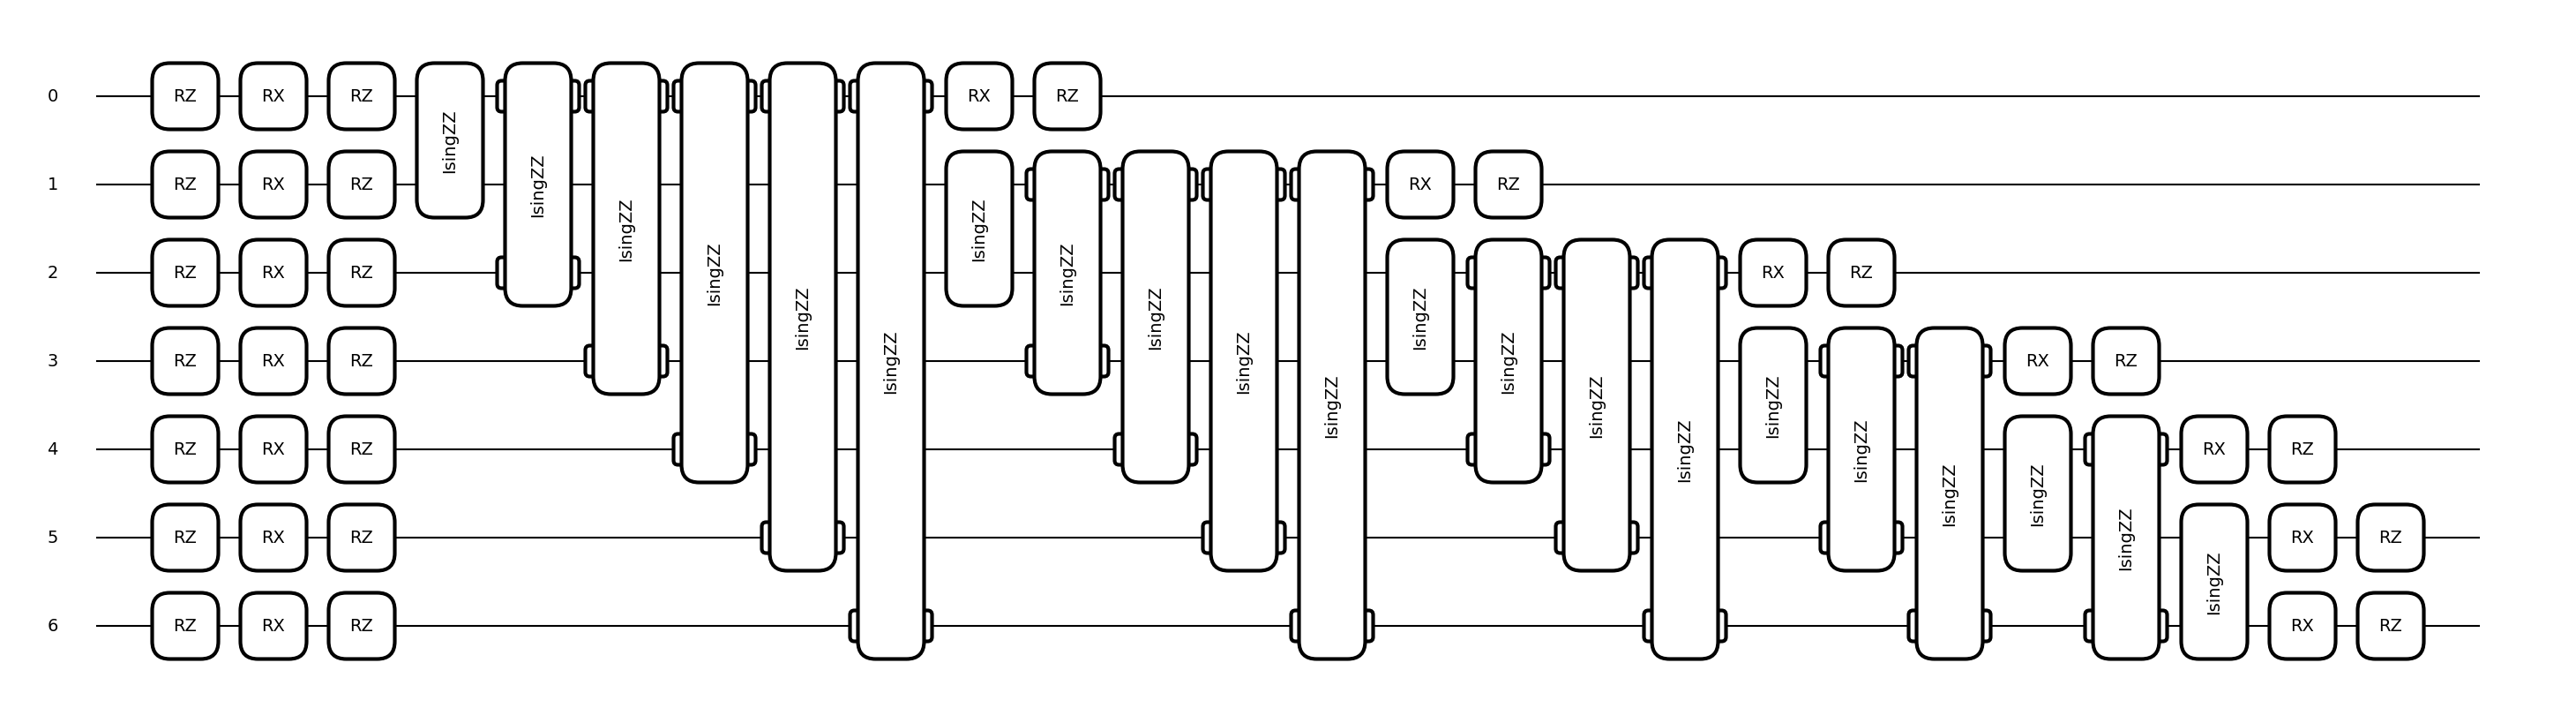

In [16]:
print(qml.draw_mpl(decode_variational_5)([1, 1, 1], [0, 1, 2, 3, 4, 5, 6], 1))